#Import Packages



In [ ]:
import  pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import scipy as sp
import statsmodels.api as st
from statsmodels.formula.api import ols
from statsmodels.stats import power
from scipy.stats import f_oneway
import seaborn as sns
import numpy as np 
import random
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

#Designing Experiemnts
##The cornerstone of the practice of statistics
#The Classical significance statistical inference Pipeline

1. Formulate Hypothesis
2. Design Experiment
3. Collect Data
4. Inference Conclusions


#A/B Testing
##An A/B test is an experiment with two groups to establish which of two treatments, products, procedures, or the like is superior

**KEY TERMS FOR A/B TESTING**

**Treatment**
Something (drug, price, web headline) to which a subject is exposed.

**Treatment group**
A group of subjects exposed to a specific treatment.

**Control group**
A group of subjects exposed to no (or standard) treatment.

**Randomization**
The process of randomly assigning subjects to treatments.

**Subjects**
The items (web visitors, patients, etc.) that are exposed to treatments.

**Test statistic**
The metric used to measure the effect of the treatment.

A/B tests are common in web design and marketing, since results are so readily measured. Some examples include:

*  Testing two soil treatments to determine which produces better seed germination

*  Testing two therapies to determine which suppresses cancer more effectively

* Testing two prices to determine which yields more net profit

* Testing two web headlines to determine which produces more clisk

* Testing two web ads to determine which generates more conversions


#Proper A/B Test

**A proper a/b test has subjects that can be assigned to one treatment or another. The subject might be a person, a plant seed, a web visitor, the key is that the subject is exposed to the treatment**

**Ideally the subjects are randomized (Assigned randomly) to treatments. This insures that any difference between treatment groups is due to one of two things:


1.   The effect of the different treatments
2.   Luck of the draw in which subjects are assigned to which treatments


*Statistical hypothesis testing was invented as a way to protect researchers from being fooled by random chance.*



#Alternative Hypothesis
*Hypothesis tests by their nature involve not just a null hypothesis but also an offsetting alternative hypothesis. Here are some examples:*

* Null = “no difference between the means of group A and group B”; alternative = “A is different from B” (could be bigger or smaller)

* Null = “A ≤ B”; alternative = “A > B”

* Null = “B is not X% greater than A”; alternative = “B is X% greater than A”

1. **Directional alternative hypothesis (B is better than A)**. 
In such a case, you use a **one-way (or one-tail)** hypothesis test. This means that extreme chance results in only one direction count toward the p-value.

2.  **Bidirectional alternative hypothesis (A is different from B; could be bigger or smaller**). In such a case, you use a **two-way (or two-tail) hypothesis**. This means that extreme chance results in either direction count toward the p-value.



# Permutation Steps: Think Shuffling with or without Replacement

**Permutation test**
The procedure of combining two or more samples together and randomly (or exhaustively) reallocating the observations to resamples.


**Resampling**
Drawing additional samples (“resamples”) from an observed data set.

**With or without replacement**
In sampling, whether or not an item is returned to the sample before the next draw.



* Permute means to change the order of a set of values. 
* The first step in a permutation test of a hypothesis is to combine the results from groups A and B 
* This is the logical embodiment of the null hypothesis that the treatments to which the groups were exposed do not differ. **Thus combined test and control groups will average no different then the first test (proving the null hypothesis**


1. Combine the results from the different groups into a single data set

2. **Shuffle** the combined data and then **randomly draw (without replacement)** a reasample of the same size as group A 

3. From the remaining data, randomly draw(without replacemnet) a  resample of the same size as group B

4. Do the same for groups C,D and so on. You have now collected one set of resamples that mirror the sizes of the orgional samples

5. Whatever statistic or estimae was calculated for the orgional samples (e.g., difference in group proportions), calculate it not for the resamples, and record; this constitutes one permutation iteration

6. Repeat the previous steps n times to uield a permutation distributions of the test statistic

##Now Compare the observed difference between the two original groups and your permuted groups differences, 

#IF the observation lies well within the set of permuted differences then we FAIL to Reject the Null Hypothesis

#However, if the observed difference **lies outside** most of the **permutation distribution**, then we conclude that chance is not responsible. In technical terms, the difference is **statistically significant**. 


#Example: Web Stickiness

-->Company is testing what two web prentations does a better job selling their service
--> They have decided to use a **proxy variable** clicks & sessions times

Difference between two pages average sessions times is Time    0.356667
dtype: float64


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


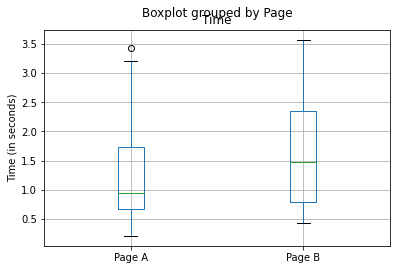

In [ ]:
data = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/web_page_data.csv"
session_times = pd.read_csv(data)
#print(session_times.head(10))
#Make boxplot'
plot = session_times.boxplot(by = 'Page', column = 'Time')
plot.set_xlabel('')
plot.set_ylabel('Time (in seconds)')
#It seems that sessions times are longer for Page B, lets test their means
mean_a = session_times[session_times.Page == 'Page A'].mean()
mean_b = session_times[session_times.Page == 'Page B'].mean()
print("Difference between two pages average sessions times is {}".format(mean_b-mean_a))
#36 second differnce

**The question is whether this difference is within the range of what random chance might produce, i.e., is statistically significant.**


**One way to answer this is to apply a permutation test—combine all the times together and then repeatedly shuffle and divide them into groups of 21 (recall that nA=21
 for page A) and 15 (nB=15
 for page B).**

 **To apply a permutation test, we need a function to randomly assign the 36 times to a group of 21 (page A) and a group of 15 (page B)**

## random permutation test 

In [ ]:
# This function permutes the A & B group and outputes 
# the mean differences of the random permutations where nA is the count of Page A and nB is the count of Page B

def perm_fun (x,nA,nB):
  n = nA+nB
  idx_B = set(random.sample(range(n),nB))
  idx_A = set(range(n)) - idx_B
  return x.loc[idx_B].mean()-x.loc[idx_A].mean()

nA = len(session_times[session_times.Page == 'Page A'])
nB = len(session_times[session_times.Page == 'Page B'])

Time    0.356667
dtype: float64


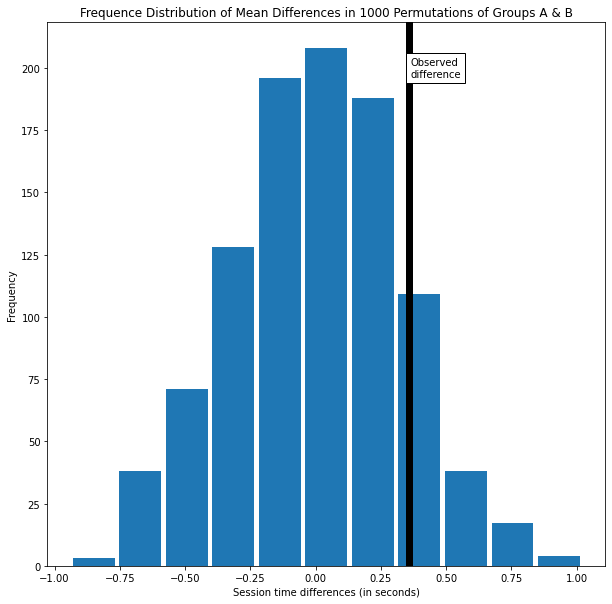

In [ ]:
#use perf_fun and permutate sessions times by page Type 1000 times
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]
test_dif = mean_b - mean_a
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = .3566, color='black', lw=7)
txt = 'Observed\ndifference'

ax.text(.65,.9,txt,transform=ax.transAxes,bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')
ax.set_title("Frequence Distribution of Mean Differences in 1000 Permutations of Groups A & B")
print(test_dif)

**italicized text*The histogram above shows that mean difference of random permutations often exceeds the observed difference in times (the vertical line)**

In [ ]:
f = (mean_b - mean_a).astype('float')
g = pd.Series(perm_diffs).to_frame()
g['bool'] = np.where(g[0] >= 
                     .3665,'True','False')
g['bool'].value_counts()
Percentage_True = 130/(1000)



print("After permutations we find that {}% of the time the diffence in A and B pages can happen proving Ho to be true(there are no distinct difference in the pages that would results in higher revenue)".format(Percentage_True))
print("This suggests that the observed difference in time between page A and page B is well within the range of chance variation and thus is not statistically significant.")

            0   bool
0    0.203524  False
1   -0.093619  False
2    0.134952  False
3    0.008095  False
4    0.094952  False
..        ...    ...
995  0.004667  False
996 -0.245619  False
997 -0.007905  False
998 -0.879905  False
999  0.050381  False

[1000 rows x 2 columns]
After permutations we find that 0.13% of the time the diffence in A and B pages can happen proving Ho to be true(there are no distinct difference in the pages that would results in higher revenue)
This suggests that the observed difference in time between page A and page B is well within the range of chance variation and thus is not statistically significant.



**This suggests that the observed difference in time between page A and page B is well within the range of chance variation and thus is not statistically significant.**

#Exhaustive and Bootstrap Permutation Tests

1. In an **Exhaustive Permutation**
test, instead of randomly shuffling and dividing data, it determines all the possible ways it can be divided. These test are also known as *exact tests* due to their statistical property of guaranteeing that the null model will not test as "significant" more than the alpha level of the test

* good for small data
* random perm test work nearly as good on large data without computational effort

2. In a **bootstrap permutation** the draws are *with replacement* instead of without


##Key Ideas


* In a permutation test, multiple samples are combined and then shuffled.

* The shuffled values are then divided into resamples, and the statistic of interest is calculated.

* This process is then repeated, and the resampled statistic is tabulated.

* Comparing the observed value of the statistic to the resampled distribution allows you to judge whether an observed difference between samples might occur by chance.





#Statistical Significane & p-values

**Statistical significance is how staticians measure whether an experiment yields a reult more extreme than what chance might produce**

* If the result is beyond the realm of chance variation, it is said to be statistically significant

##Key Terms

**p-value**

The p-value is the probability of obtaining results as unusual or extreme as the observed results

**Alpha**

The probability threshold of "unusualness" that chance results must surpass for actual outcomes to be deemed statistically signficant

**Type 1 error** ie *False Positive*

Mistakenly concluding an effect is real (when it is due to chance)

**Type 2 error** ie *False Negative*

Mistakenly concluding an effect is due to chance (when it is real)




In [ ]:


data = {'Outcome': ['Conversion','No Conversion'],
'Price A': [200, 23539], 'Price B': [182,22406]}

pd.DataFrame.from_dict(data)
#Price A converts 5% better than Price B 
Price_A_CRV = (200/(23539+200))*100
Price_B_CRV = (182/(22406+182))*100
print(Price_A_CRV - Price_B_CRV)
#Conversion Rate higher for Price A
print(Price_A_CRV)
#Conversion rate lowe for Price B
print(Price_B_CRV)
#Requires statistical test to determine if this due to random varaition due to low CRV rates

0.03675791182059274
0.8424954715868402
0.8057375597662475


##Steps to Statistical Signifigance

1. Put cards labeled 1 and 0 in a box: this represents the supposed shared conversion rate of 382 ones and 45,945 zeros = 0.008246 = 0.8246%.

2. Shuffle and draw out a resample of size 23,739 (same n as price A), and record how many 1s.

3. Record the number of 1s in the remaining 22,588 (same n as price B).

4. Record the difference in proportion of 1s.

5. Repeat steps 2–4.

6. How often was the difference >= 0.0368?

In [ ]:
# Find shared conversion Rate
shared_crv = (200+182)/(23539+22406+200+182)
print(shared_crv*100)
#shuffle and draw out a resample of size 23,739 
#(same n as price A), and record how many 1s

0.8245731430915016


Observed difference: 0.0368%
0    45945
1      382
dtype: int64
0.03675791182059275


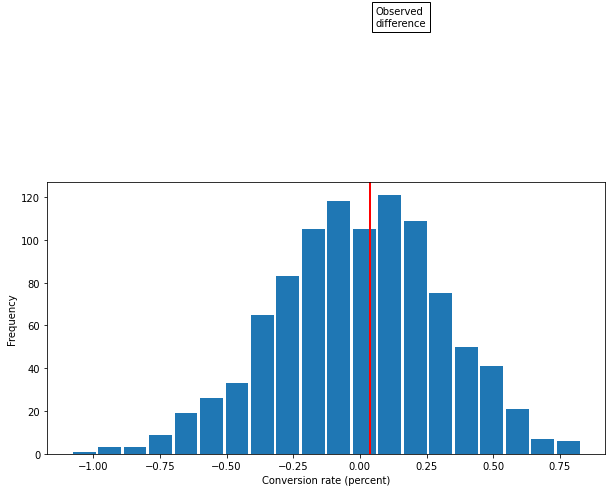

In [ ]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
obs_pct_diff
print(f'Observed difference: {obs_pct_diff:.4f}%')
#make list of none conversions
conversion = [0] * 45945
#Add conversions ie 1's 
conversion.extend([1] * 382)
#convert to series
#series is equal to the proportion of 1's and 0s in the total pop
conversion = pd.Series(conversion)
print(conversion.value_counts())
#Utilizize permuatation function from past code
#perm_fun takes the series we have created(1,0s) & the size of each control and test
perf_diffs = [100*perm_fun(conversion,23739,22588) for x in range(1000)]
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(perm_diffs, bins = 20, rwidth=.9)
ax.axvline(x=obs_pct_diff, color='red', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')


print(obs_pct_diff)

In [ ]:
np.mean(perf_diffs)

0.0012909165583130488

**Above histogram shows the distrubition of the difference of Conversion Rate between Price A & Price B**

**We see that the observed difference of 0.0368% is well within the range of chance variation** -- hence there is no statistical significance to show the Price A is better then Price B **(and it could be do to randome chance)**

#p-Value

##Looking at a graph is not a very precise way to measure statistical significance, so we use p-value

**This is the frequency with which the chance model produces a result more extreme than the observed result**



In [ ]:
#ESTIMATE A P VALUE 
#observerd result = 3.68% difference between groups
#after 1000 perumutations of random selection and shuffling how often are the two groups
#different by 3.68% or more
print("{}% of the time the Page A and B with have a 3.68% difference in groups or more".format(np.mean([diff > obs_pct_diff for diff in perf_diffs])))



0.343% of the time the Page A and B with have a 3.68% difference in groups or more


#Prop Testing

In this case we didnt need to use a permutation test to get a p-value!

**Since this is a binomial distribution we can approximate the p-value**

x = number of successes for each group

n = number of trials

In [ ]:
data = {'Outcome': ['Conversion','No Conversion'],
'Price A': [200, 23539], 'Price B': [182,22406]}
data
# put 1s and 0's in array for each Page type 
survivors = np.array([[200,23539],[182,22406]])
chi2,p_value,df, _ = sp.stats.chi2_contingency(survivors)
print(f'p-value for single sided test :{p_value / 2:.4f}')
print(f'p-value determined through permutation testing :{np.mean([diff > obs_pct_diff for diff in perf_diffs])}')

p-value for single sided test :0.3498
p-value determined through permutation testing :0.343


##p-val controversy

p-value is a useful metric in situations where you want to know whether a model result that appears interesting and useful is within the range of normal chance variability

**What P-value is trying to be a what it really is**

1. The probability that the result is due to chance.
2. The probability that, given a chance model, results as extreme as the observed results could occur.

A **Type 1 error**, in which you mistakenly conclude an effect is real, when it is really just due to chance (**False Positive**)

A **Type 2 error**, in which you mistakenly conclude that an effect is not real (i.e., due to chance), when it actually is real(**False Negative**)

The **alpha value** is the threshold of “unusualness” in a null hypothesis chance model.










##t-Tests

**Test statistic**
A metric for the difference or effect of interest.

**t-statistic**
A standardized version of common test statistics such as means.

**t-distribution**
A reference distribution (in this case derived from the null hypothesis), to which the observed t-statistic can be compared.

* In the 1920s and 1930s, when statistical hypothesis testing was being developed, it was not feasible to randomly shuffle data thousands of times to do a resampling test. 

* Statisticians found that a good approximation to the permutation (shuffled) distribution was the t-test, based on Gosset’s t-distribution. 

* It is used for the very common two-sample comparison—A/B test—in which the data is numeric. 

**In order for the t-distribution to be used without regard to scale, a standardized form of the test statistic must be used**




In [ ]:
#Alternative Hypothesis = Page A session time < Page B Session Time

res = sp.stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


##Multiple Testing

KEY TERMS FOR MULTIPLE TESTING

**Type 1 error**
Mistakenly concluding that an effect is statistically significant.

**False discovery rate**
Across multiple tests, the rate of making a Type 1 error.

**Alpha inflation**
The multiple testing phenomenon, in which alpha, the probability of making a Type 1 error, increases as you conduct more tests.

**Adjustment of p-values**
Accounting for doing multiple tests on the same data.

**Overfitting**
Fitting the noise.


In supervised learning tasks, a holdout set where models are assessed on data that the model has not seen before mitigates this risk. 

**In statistical and machine learning** tasks not involving a labeled holdout set, the risk of reaching conclusions based on statistical noise persists.

**Multiplicity Issues**

This issue is related to the problem of overfitting in data mining, or “fitting the model to the noise.” The more variables you add, or the more models you run, the greater the probability that something will emerge as “significant” just by chance.

* Checking for multiple pairwise differences across groups

* Looking at multiple subgroup results (“we found no significant treatment effect overall, but we did find an effect for unmarried women younger than 30”)

* Trying lots of statistical models

* Including lots of variables in models

* Asking a number of different questions (i.e., different possible outcomes)

**Data Science** mitigates multiplicty using hold out sampling & cross validation

**When no holdout is available use resampling and simulation heuristics to provide random chance benchmanrks againts which obersrved results can be compared**





##Degress of Freedom

**df = (n-1)**
1. If you use n sample with be bias (Downward) if you use n-1 sample will be free of bias
2. Not very relevent in the data science world but import for Categorical variables in a logistic regressions model to be n-1

##Anova

* Instead of an A/B test suppose we had a comparision of multiple groups A/B/C/D each with numerical data

* The statistical procedure that tests for a statistically significant differenec among groups is called analysis of variance or *ANOVA*

Key Terms

1. **Pairwise comparision**
A hypothesis test (of means) between two groups amount multiple groups
2. **Omnibu test**
A single hypothsis test of the *overall* variance amount multiple group means 
3. **Decomposition of variance**
Seperation of components contributing to an individual value
4. **F-statistic**
A standardizaed statistic that measures the extent to which difference among group means exceed what might be expected in a chance model
5. **SS**
"Sum of Squares", refering to deviations from some average value

##Web Stickness for 4 different pages

Text(0, 0.5, 'Time (in seconds)')

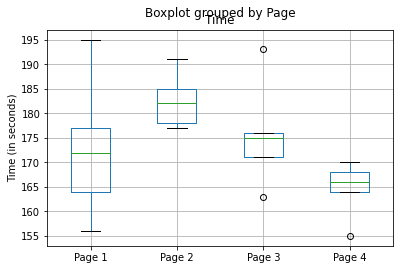

In [ ]:
data = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/four_sessions.csv"
df = pd.read_csv(data)

df.groupby('Page')['Time'].mean().to_frame()

#Make boxplot'
plot = df.boxplot(by = 'Page', column = 'Time')
plot.set_xlabel('')
plot.set_ylabel('Time (in seconds)')

##ANOVA Steps

The procedure used to test this is ANOVA. The basis for it can be seen in the following resampling procedure (specified here for the A/B/C/D test of web page stickiness):

1. Combine all the data together in a single box.

2. Shuffle and draw out four resamples of five values each.

3. Record the mean of each of the four groups.

4. Record the variance among the four group means.

5. Repeat steps 2–4 many (say, 1,000) times.

**What proportion of the time did the resampled variance exceed the observed variance?** This is the p-value.

Observed Variance: 55.426666666666655
Observed means: [172.8 182.6 175.6 164.6]
Pr(Prob) 0.082


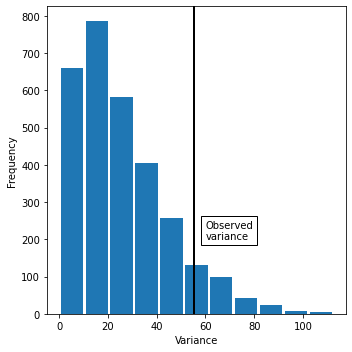

In [ ]:
observed_variance = df.groupby('Page').mean().var()[0]
#variance betweeen the mean of each page group session time is meausred
print('Observed Variance:' ,observed_variance)
#observed means are also listed
print('Observed means:', df.groupby('Page').mean().values.ravel())
#Create permutation function to shuffle and draw out samples 

def perm_test(df):
  df = df.copy()
  df['Time'] = np.random.permutation(df['Time'].values)
  return df.groupby('Page').mean().var()[0]

perm_variance = [perm_test(df) for x in range(3000)]
# This outputs suggest that 8.86% of the time the response rate among the 4
# pages might differ as much as was actually. obeserved, just by chance!
# If alpha (threshold of unusal behavior) is 5% we fail to reject the Null Hypothesis
print('Pr(Prob)', np.mean([x > observed_variance for x in perm_variance]))
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**so we conclude that the difference among the four pages could have arisen by chance**

##F-Statistic

Just like the t-test can be used instead of a permutation test for comparing the mean of two groups, there is a statistical test for ANOVA based on the *F-Statistic*

1. The F-statistic is based on the ratio of the variance across group means (i.e., the treatment effect) to the variance due to residual error. 

2. **The higher this ratio, the more statistically significant the result.**

3. **The F-statistic is based on the ratio of the variance across group means**

In [ ]:
model = ols('Time ~ C(Page)', data=df).fit()
#anova_table = st.stats.anova_lm(model, typ=2)
#anova_table

anova_table = st.stats.anova_lm(model)
anova_table

#LOW F value mens that little variance in y is explained by X variables fail to reject

#PR>F is 7.7% still not less than 5% alpha threshold mean that the variation could be due to randome chance

res = sp.stats.f_oneway(df[df.Page == 'Page 1'].Time, 
                     df[df.Page == 'Page 2'].Time,
                     df[df.Page == 'Page 3'].Time,
                     df[df.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue / 2:.4f}')
print(anova_table.head(10))


F-Statistic: 1.3699
p-value: 0.0388
            df  sum_sq     mean_sq         F    PR(>F)
C(Page)    3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN



* ANOVA is a statistical procedure for analyzing the results of an experiment with multiple groups.

* The null hypothesis says that nothing you put in your regression equation helps explain your outcome variable. The alternative hypothesis humbly states that at least one explanatory variable helped explain the outcome variable.

The test statistic is an F-statistic that is given by
* It is the extension of similar procedures for the A/B test, used to assess whether the overall variation among groups is within the range of chance variation.

* A useful outcome of ANOVA is the identification of variance components associated with group treatments, interaction effects, and errors.

# Decomposition of Variance

Observed values in a data set can be considered sums of different components.

**Decomposition of Variance**

For any observed data value within a data set includes:

1.Grand Average

2.The treatment effect

3.the residual error

##Explained Variability

The **Sum of Squares Explained (SSE)** (sometimes referred to as the Sum of Squares Regression) is a measure of the variability in the outcome variable that is **explained** by the explanatory variables, i.e. the x-variables in your regression. It is given by the following sum:

# > Indented block



**SSE=∑(ŷ i−y¯)^2**

^^sum of your predicitions minus mean(best guess) **squared**

**dfE = # of explained variables**

**MSE=SSE/dfE**

*Mean Sum of squared explained*

##Residual or Unexplained Variablity

**Sum of Squares Residual(SSR)** OR (**Sum of Squared Errors(SSE)**  is a measure of the variability in the outcome varaible that is not explained by your regression

**SSR=∑=(yi−ŷ)^2**

**MSR = SSE/DFr**

**RMSR = sqrt(MSR)**

##Total Variability

**SST = SSE + SSR**

**R^2 = SSE /SST**

**F = MSE/MSR**

#Two Way Anova

In which you have 4 groups and 2 varying weekday types(Weekend and Weekday)

IE 

1. Group A: Weekend
2. Group A: Weekday
3. Group B: Weekday 
4. etc






In [ ]:
np.sqrt(101.2)

10.059821071967434

#Chi-Square Test

**The Chi-Square test is used with count data to test how well it fits some expected distribution**

* chi-square statistic in statistical practice is with r×c
 contingency tables 
  * r*c means "rows and columns" -   a  2x3 table has two rows and three columns
  







In [ ]:
db_observed = {'Headline A': [14,986], 'Headline B':[8,992],'Headline C':[12,988]}
ob = pd.DataFrame(index = ['Click','No Click'],data = db_observed)
db_expected = {'Headline A': [11.33,988.67], 'Headline B':[11.33,988.67],'Headline C':[11.33,988.67]}
ex = pd.DataFrame(index = ['Click','No Click'],data=db_expected)
#db_expected equals sum(clicks)/sum(total_clicks) ie null hpythoesis
#R = Observe - Expected / sqrt(expected)
Residuals = (np.subtract(ob,ex)/np.sqrt(ex))**2
g = np.sum(Residuals).to_frame()
test_stat = g.sum()
print('chi_sqaure_test_stat:-->',test_stat)


chi_sqaure_test_stat:--> 0    1.666427
dtype: float64


#Permutation (resampled chi-square statistic) based Chi test 

In [ ]:
click_rate = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/click_rates.csv')
click_rate 
clicks =click_rate.pivot(index = 'Click', columns = 'Headline', values='Rate')
print(clicks)

box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')



Headline  Headline A  Headline B  Headline C
Click                                       
Click             14           8          12
No-click         986         992         988
Observed chi2: 1.6659
Resampled p-value: 0.4965


##Approximating Chi-Square Test: Statistical Theory

In [ ]:
chisq, pvalue, df, expected = sp.stats.chi2_contingency(clicks)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


#R.A Fisher  Test
* The chi-square distribution is a good approximation of the shuffled resampling test just described, except when counts are extremely low (single digits, especially five or fewer)

* procedure to actually enumerate all the possible rearrangements (permutations) that can occur, tabulate their frequencies, and determine exactly how extreme the observed result

# Power and Sample Size

KEY TERMS:

**Effect Size** :
The minimum size of the effect that you hope to be able to detect in a statistical test : as as a "a 20% improvement in click rates"

**Power**:The probability of detecting a given effect size with a given sample size

**Signifigance Level** : The statistical signifigance level at which the test will be conducted

**Sample Size**

But it makes sense that **the bigger the actual difference** between treatments A and B, the greater the probability that our experiment will reveal it; and the smaller the difference, the more data will be needed to detect it. 

IE to detect small differences need more data
Large differences easy to detect



##Calculating Sample Size using Power, Effect Size, and Sig level with CODE!



In [ ]:
effect_size = st.stats.proportion_effectsize(0.012, 0.011)
analysis = st.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size,
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 140498.254


Finding out how big a sample size you need requires thinking ahead to the statistical test you plan to conduct.

You must specify the minimum size of the effect that you want to detect.

You must also specify the required probability of detecting that effect size (power).

Finally, you must specify the significance level (alpha) at which the test will be conducted.

##Detecting Power

1. Start with some hypothetical data that represents your best guess about 
the data that will result (perhaps based on prior data)—for example, a box with 20 ones and 80 zeros to represent a .200 hitter, or a box with some observations of “time spent on website.”

2. Create a second sample simply by adding the desired effect size to the first sample—for example, a second box with 33 ones and 67 zeros, or a second box with 25 seconds added to each initial “time spent on website.”

3. Draw a bootstrap sample of size n from each box.

4. Conduct a permutation (or formula-based) hypothesis test on the two bootstrap samples and record whether the difference between them is statistically significant.

Repeat the preceding two steps many times and determine how often the difference was significant—that’s the estimated power.